<a href="https://colab.research.google.com/github/Syiful047/SENIN-SIANG_SYIFUL-ANAM_0110222144/blob/main/Praktikum05_Mandiri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Memanggil data lewat gdrive
path = "/content/gdrive/MyDrive/MATKUL/SEMESTER_SEVEN/MACHINE_LEARNING/PRAKTIKUM/Praktikum05"

In [ ]:
# Membaca data file CSV
df = pd.read_csv(path + "/data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Melihat info dasar dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Mengecek nilai yang hilang
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
# Pisahkan fitur (X) dan target (y)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [ ]:
# Split data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nJumlah data training:", len(X_train))
print("Jumlah data testing :", len(X_test))


Jumlah data training: 120
Jumlah data testing : 30


In [ ]:
# Membuat model Decision Tree dan latih
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Memprediksi menggunakan data testing
y_pred = model.predict(X_test)


Akurasi Model: 1.0

Laporan Klasifikasi:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



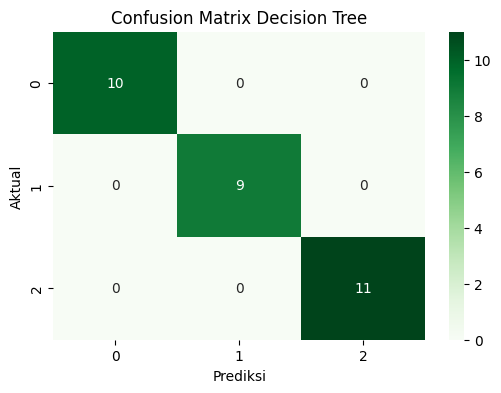

In [ ]:
# Evaluasi model
print("\nAkurasi Model:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix Decision Tree")
plt.show()

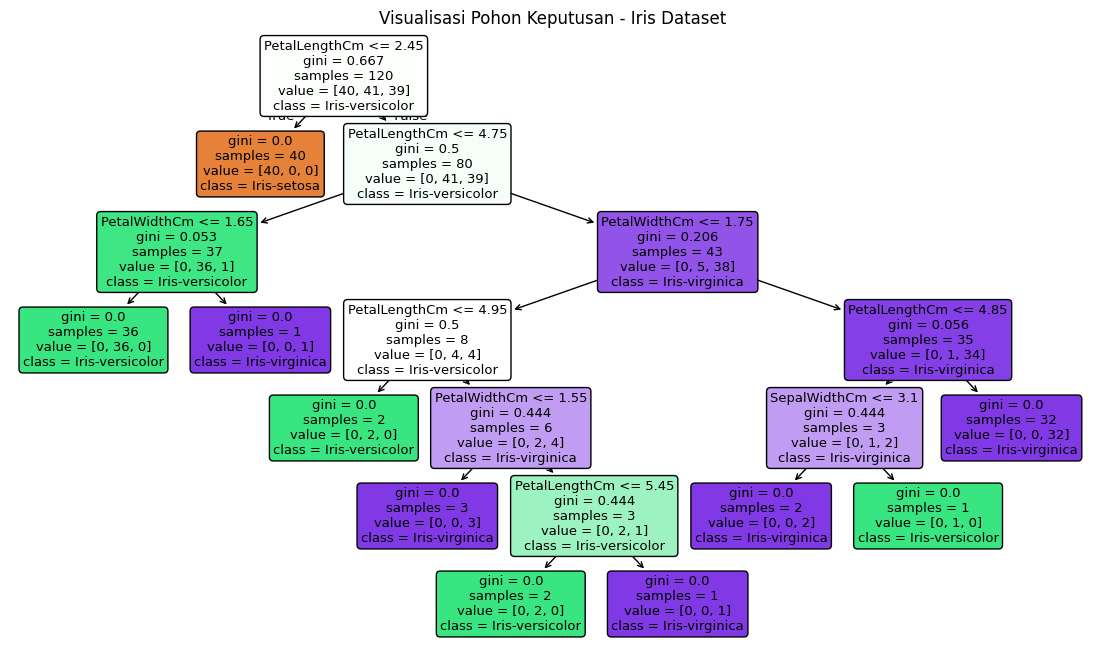

In [ ]:
# Visualisasi pohon keputusan
plt.figure(figsize=(14,8))
plot_tree(
    model,
    filled=True,
    feature_names=X.columns,
    class_names=model.classes_,
    rounded=True
)
plt.title("Visualisasi Pohon Keputusan - Iris Dataset")
plt.show()